<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_09_ProjNine_NonLinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import (datasets, metrics, linear_model, neighbors, svm, tree, semi_supervised)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.gaussian_process import (GaussianProcessRegressor, kernels)
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.naive_bayes import (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB)
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor,
                              GradientBoostingClassifier, GradientBoostingRegressor,
                              BaggingClassifier, BaggingRegressor,
                              ExtraTreesClassifier, ExtraTreesRegressor,
                              AdaBoostClassifier, AdaBoostRegressor,
                              HistGradientBoostingClassifier, HistGradientBoostingRegressor,
                              StackingClassifier, StackingRegressor,
                              VotingClassifier)

print(sys.version)
print("numpy:", np.__version__)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
numpy: 1.23.5


In [ ]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

x_train: (112, 4) x_test: (38, 4)
y_train: (112,) y_test: (38,)


accurracy: 0.9736842105263158
confusion matrix (train set):
 [[35  0  0]
 [ 0 39  2]
 [ 0  0 36]]
confusion matrix (test set):
 [[15  0  0]
 [ 0  9  0]
 [ 0  1 13]]


Text(0, 0.5, 'Feature two')

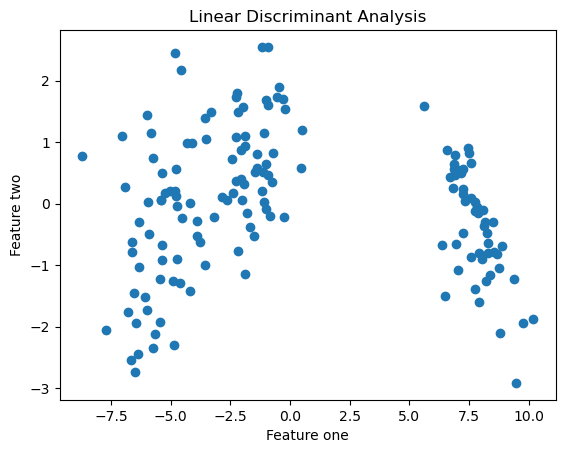

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
trans = clf.transform(data.data)

print("accurracy:", metrics.accuracy_score(y_test, y_predict))
print("confusion matrix (train set):\n", metrics.confusion_matrix(y_train, clf.predict(x_train)))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_predict))

plt.scatter(trans[:, 0], trans[:, 1])
plt.title("Linear Discriminant Analysis")
plt.xlabel("Feature one")
plt.ylabel("Feature two")

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("accurracy:", metrics.accuracy_score(y_test, y_predict))
print("confusion matrix (train set):\n", metrics.confusion_matrix(y_train, clf.predict(x_train)))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_predict))

accurracy: 0.9473684210526315
confusion matrix (train set):
 [[35  0  0]
 [ 0 39  2]
 [ 0  0 36]]
confusion matrix (test set):
 [[15  0  0]
 [ 0  8  1]
 [ 0  1 13]]


accurracy: 1.0


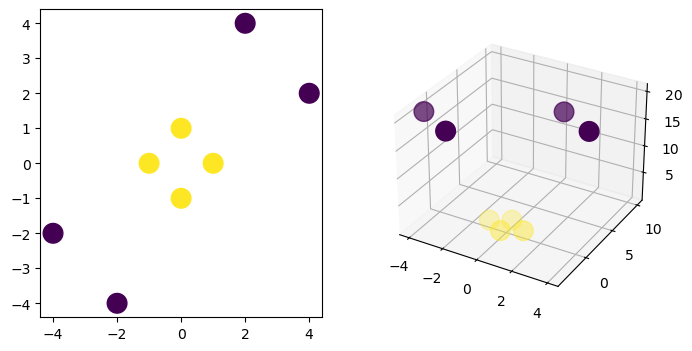

In [ ]:
def map_feature(x):
    return np.array([x[:, 0], x[:, 1], x[:, 0]**2 + x[:, 1]**2]).T

x = np.array([[0, 1], [1, 0], [2, 4], [4, 2], [0, -1], [-1, 0], [-2, -4], [-4, -2]])
y = np.array([1, 1, 0, 0, 1, 1, 0, 0])
x_kern = metrics.pairwise.rbf_kernel(x, gamma = 1.0/x.shape[1]).round(3)
clf = linear_model.RidgeClassifier()
clf.fit(x_kern, y)
y_predict = clf.predict(x_kern)
print("accurracy:", metrics.accuracy_score(y, y_predict))

z = map_feature(x)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,2,1)
ax.scatter(x[:, 0], x[:, 1], c = y, cmap = "viridis", s = 200)
ax = fig.add_subplot(1,2,2, projection="3d")
ax.scatter3D(z[:, 0], z[:, 1], z[:, 2], c = y, cmap = "viridis", s = 200)
X, Y = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))
Z = np.zeros((10, 10)) + 10
ax.plot_surface(X, Z, Z, alpha = 0.25)

In [ ]:
data = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)
reg = KernelRidge()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

print("mse: ", metrics.mean_squared_error(y_test, y_predict))

mse:  25171.83965970483


In [ ]:
data = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

x_train: (1347, 64) x_test: (450, 64)
y_train: (1347,) y_test: (450,)


In [ ]:
clf = neighbors.NearestCentroid(metric='euclidean', shrink_threshold=.25)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("accurracy:", metrics.accuracy_score(y_test, y_predict))
print("confusion matrix (train set):\n", metrics.confusion_matrix(y_train, clf.predict(x_train)))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_predict))

accurracy: 0.8866666666666667
confusion matrix (train set):
 [[125   0   0   0   0   0   0   0   0   0]
 [  0 103   8   0   0   1   2   0   7  12]
 [  0   5 117   3   0   0   0   1   4   2]
 [  0   1   1 136   0   1   0   6   5   2]
 [  0   5   0   0 122   0   0   5   1   0]
 [  0   0   0   0   0 124   1   0   0  13]
 [  1   3   0   0   0   0 131   0   1   0]
 [  0   0   0   0   0   2   0 136   2   0]
 [  0  10   1   1   0   1   0   1  97   7]
 [  0   2   0   1   3   2   0   4   0 128]]
confusion matrix (test set):
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 39  1  0  0  0  1  0  3  5]
 [ 1  1 41  1  0  0  0  1  0  0]
 [ 0  0  0 29  0  0  0  0  0  2]
 [ 0  0  0  0 46  0  0  0  2  0]
 [ 0  0  0  0  1 39  0  0  0  4]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  7  0  0  0  1  1  2 40  5]
 [ 0  1  0  0  1  3  0  3  2 30]]


In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("accurracy:", metrics.accuracy_score(y_test, y_predict))
print("confusion matrix (train set):\n", metrics.confusion_matrix(y_train, clf.predict(x_train)))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_predict))

accurracy: 0.9733333333333334
confusion matrix (train set):
 [[125   0   0   0   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0   0   0]
 [  0   0 132   0   0   0   0   0   0   0]
 [  0   0   0 151   0   0   0   1   0   0]
 [  0   0   0   0 132   0   0   1   0   0]
 [  0   0   0   0   0 135   1   0   0   2]
 [  0   0   0   0   0   0 135   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   2   0   2   0   0   0   0 114   0]
 [  0   0   0   1   0   1   0   0   0 138]]
confusion matrix (test set):
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  1  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  4  0  0  0  0  0  0 52  0]
 [ 0  1  0  1  0  1  0  0  2 35]]


In [ ]:
nca = neighbors.NeighborhoodComponentsAnalysis(n_components=3)
nca.fit(x_train, y_train)
clf = neighbors.KNeighborsClassifier()
clf.fit(nca.transform(x_train), y_train)
y_predict = clf.predict(nca.transform(x_test))
print("accurracy:", metrics.accuracy_score(y_test, y_predict))
print("confusion matrix (train set):\n", metrics.confusion_matrix(y_train, clf.predict(nca.transform(x_train))))
print("confusion matrix (test set):\n", metrics.confusion_matrix(y_test, y_predict))

accurracy: 0.8244444444444444
confusion matrix (train set):
 [[122   0   0   0   0   1   1   0   0   1]
 [  0 125   0   0   0   0   2   1   5   0]
 [  0   2 124   3   0   0   0   1   2   0]
 [  0   1   3 140   0   1   0   1   2   4]
 [  0   0   0   0 130   1   1   0   1   0]
 [  0   0   0   1   0 131   0   3   1   2]
 [  0   5   0   0   0   0 129   0   2   0]
 [  0   1   0   0   0   1   0 134   2   2]
 [  0   6   1   2   0   0   0   0 108   1]
 [  0   0   0   4   0   3   0   4   3 126]]
confusion matrix (test set):
 [[46  0  0  0  0  1  4  0  0  2]
 [ 0 39  1  0  0  0  2  3  4  0]
 [ 0  0 40  3  0  0  0  0  2  0]
 [ 0  0  0 26  0  0  0  0  1  4]
 [ 0  2  0  0 43  0  1  1  0  1]
 [ 0  0  0  5  1 32  0  2  0  4]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  2  0 36  0  1]
 [ 0  6  3  1  0  1  3  2 37  3]
 [ 0  0  0  3  1  3  0  4  1 28]]


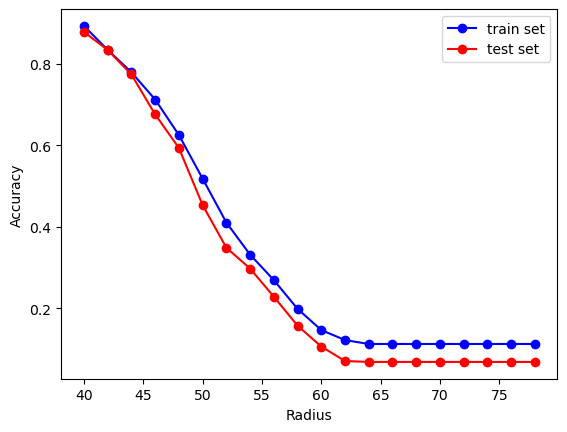

In [ ]:
rad = np.arange(40,80,2)
accur_test = []
accur_train = []

for r in rad:
    clf = neighbors.RadiusNeighborsClassifier(radius = r)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    accur_test.append(metrics.accuracy_score(y_test, y_predict))
    accur_train.append(metrics.accuracy_score(y_train, clf.predict(x_train)))

plt.plot(rad, accur_train, '-o', c = 'b', label = "train set")
plt.plot(rad, accur_test, '-o', c = 'r', label = "test set")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
data = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

grid_search = GridSearchCV(neighbors.KNeighborsRegressor(),
                           {'n_neighbors': [3, 12, 24, 46, 64],
                            'weights': ['uniform', 'distance'],
                            'algorithm': ['brrute', 'ball_tree', 'kd_tree']
                           }, cv =5
                          )
grid_search.fit(x_train, y_train)
neigh = grid_search.best_estimator_
print("best estimator_:", neigh)

neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)

print("mse:", metrics.mean_squared_error(y_test, y_pred))
print("r2:", metrics.r2_score(y_test, y_pred))

best estimator_: KNeighborsRegressor(algorithm='ball_tree', n_neighbors=24, weights='distance')
mse: 3776.7867812904715
r2: 0.44790976616273703


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/neighbors/_regression.py", line 215, in fit
    self._validate_params()
  File "/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params

(100, 1) (100,)
(100, 1) (100,) (100, 100) (100, 1)


Text(0, 0.5, 'prior samples')

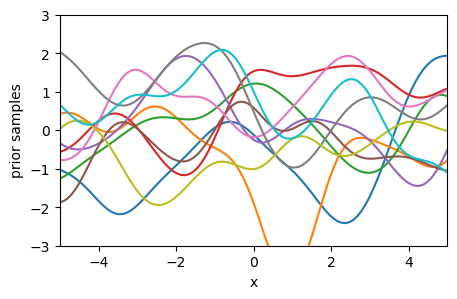

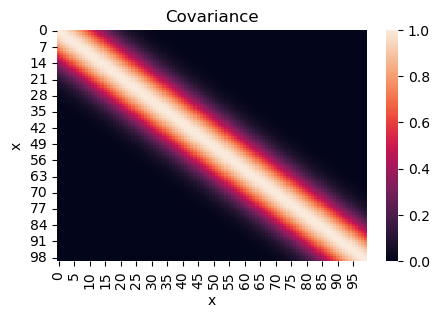

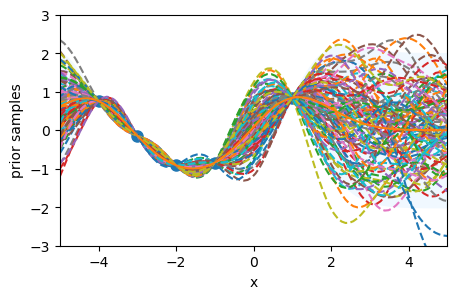

In [ ]:
def kernel(x1, x2, l = 1.0, sigma = 1.0):
    d = (x1 - x2.T)**2
    return sigma * np.exp(-d/2/l**2)

np.random.seed(0)
n = 100
x_test = np.linspace(-5, 5, n).reshape(-1,1)
mu = np.zeros(x_test.shape)
cov = kernel(x_test, x_test)
prior_samples = np.random.multivariate_normal(mu.reshape(-1), cov, 10)

print(mu.shape, mu.reshape(-1).shape)

plt.figure(figsize=(5,3))
plt.plot(x_test, prior_samples.T)
plt.xlim(-5,5)
plt.ylim(-3,3)
plt.xlabel("x")
plt.ylabel("prior samples")

plt.figure(figsize=(5,3))
ax = sns.heatmap(cov)
ax.set(xlabel="x", ylabel="x", title="Covariance")

x_train = np.array([-4,-3,-2,-1,1]).reshape(-1,1)
y_train = np.sin(x_train)

K = kernel(x_train, x_train)
K_s = kernel(x_train, x_test)
K_ss = kernel(x_test, x_test)
K_inv = np.linalg.inv(K)

mu_post = K_s.T.dot(K_inv).dot(y_train)
cov_post = K_ss - K_s.T.dot(K_inv).dot(K_s)
sd = np.sqrt(np.diag(cov_post)).reshape(mu_post.shape)
print(mu_post.shape, mu_post.ravel().shape, cov_post.shape, sd.shape)

prior_samples = np.random.multivariate_normal(mu_post.ravel(), cov_post, 100)

plt.figure(figsize=(5,3))
plt.plot(x_train, y_train, 'o', ms=8)
plt.plot(x_test, prior_samples.T, '--')
plt.gca().fill_between(np.squeeze(x_test), np.squeeze(mu_post-2*sd),
                       np.squeeze(mu_post+2*sd), color = "aliceblue")
plt.plot(x_test, mu_post)
plt.xlim(-5,5)
plt.ylim(-3,3)
plt.xlabel("x")
plt.ylabel("prior samples")

gp.kernel_: RBF(length_scale=1.93)
gp.log_marginal_likelihood: -3.444937833462115
gp.kernel_: RationalQuadratic(alpha=1e+05, length_scale=1.93)
gp.log_marginal_likelihood: -3.4449718909150966
gp.kernel_: ExpSineSquared(length_scale=0.000524, periodicity=2.31e+04)
gp.log_marginal_likelihood: -3.444938145492606
gp.kernel_: DotProduct(sigma_0=0.998) ** 2
gp.log_marginal_likelihood: -150204291.56018084
gp.kernel_: Matern(length_scale=1.99, nu=1.5)
gp.log_marginal_likelihood: -5.131637070524745


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


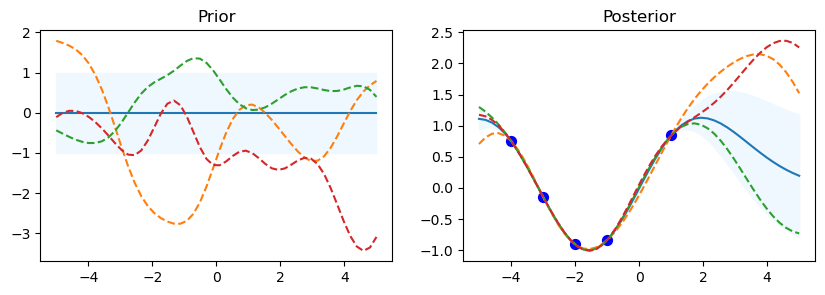

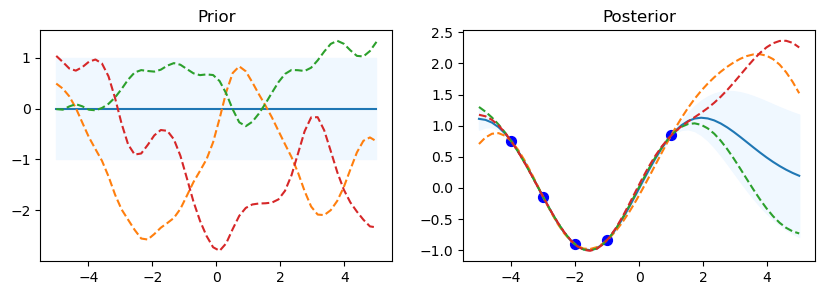

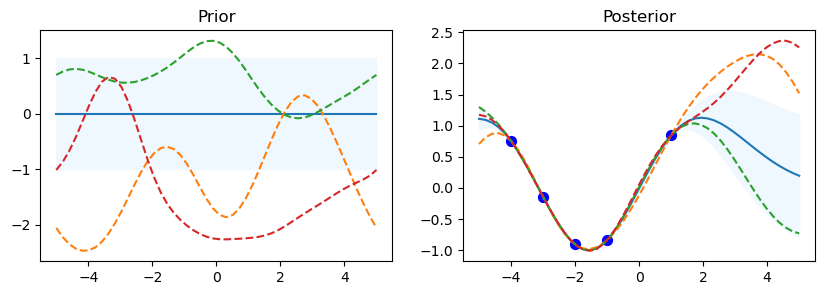

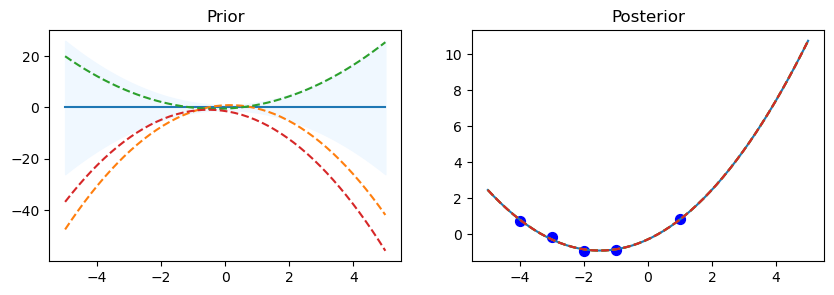

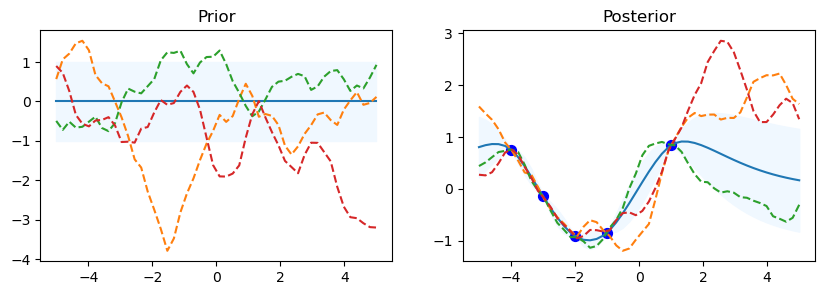

In [ ]:
np.random.seed(0)
n = 50
kernels_ = [kernels.RBF(), kernels.RationalQuadratic(),
           kernels.ExpSineSquared(periodicity=10.), kernels.DotProduct(sigma_0=1.0)**2,
           kernels.Matern()
          ]
x_test = np.linspace(-5,5,n).reshape(-1,1)
x_train = np.array([-4,-3,-2,-1,1]).reshape(-1,1)
y_train = np.sin(x_train)
for kern in kernels_:
    gp = GaussianProcessRegressor(kernel=kern)
    mu_prior, sd_prior = gp.predict(x_test, return_std=True)
    samples_prior = gp.sample_y(x_test, 3)


    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(x_test, mu_prior)
    plt.gca().fill_between(np.squeeze(x_test), np.squeeze(mu_prior-sd_prior),
                           np.squeeze(mu_prior+sd_prior), color = "aliceblue")
    plt.plot(x_test, samples_prior, "--")
    plt.title("Prior")

    gp.fit(x_train, y_train)
    mu_post, sd_post = gp.predict(x_test, return_std=True)
    mu_post = mu_post.reshape(-1)
    sample_post = np.squeeze(gp.sample_y(x_test, 3))

    plt.subplot(1,2,2)
    plt.plot(x_test, mu_post)
    plt.gca().fill_between(np.squeeze(x_test), np.squeeze(mu_post-sd_post),
                           np.squeeze(mu_post+sd_post), color = "aliceblue")
    plt.plot(x_test, sample_post, "--")
    plt.scatter(x_train, y_train, c="blue",s =50)
    plt.title("Posterior")

    print("gp.kernel_:", gp.kernel_)
    print("gp.log_marginal_likelihood:", gp.log_marginal_likelihood(gp.kernel_.theta))

PLSCanonical
mse: 0.5423802168018572
r2: -3.018366926639482
PLSRegression
mse: 0.035306596163757496
r2: 0.7968544751506619
CCA
mse: 0.08125315462998453
r2: 0.2916141117706854


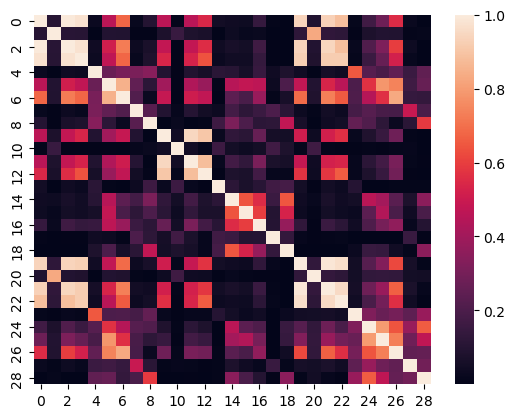

In [ ]:
x, y = datasets.load_breast_cancer(return_X_y=True)
y = np.concatenate([y.reshape(-1,1), x[:, 5].reshape(-1,1)], axis = 1)
x = np.delete(x, [5], axis = 1)
sns.heatmap(np.corrcoef(x, rowvar=False)**2)
x_train, x_test, y_train, y_test = train_test_split(x, y)
n = 2
pls_list = [
             (PLSCanonical(n_components=n), "PLSCanonical"),
             (PLSRegression(n_components=n), "PLSRegression"),
             (CCA(n_components=n), "CCA")
            ]
for model, name in pls_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(name)
    print("mse:", metrics.mean_squared_error(y_test, y_pred))
    print("r2:", metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
cnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_cnb = cnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

accuracy_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = metrics.accuracy_score(y_test, y_pred_mnb)
accuracy_cnb = metrics.accuracy_score(y_test, y_pred_cnb)
accuracy_bnb = metrics.accuracy_score(y_test, y_pred_bnb)

print("Accuracy of Gaussian Naive Bayes:", accuracy_gnb)
print("Accuracy of Multinomial Naive Bayes:", accuracy_mnb)
print("Accuracy of Complement Naive Bayes:", accuracy_cnb)
print("Accuracy of Bernoulli Naive Bayes:", accuracy_bnb)

Accuracy of Gaussian Naive Bayes: 0.9777777777777777
Accuracy of Multinomial Naive Bayes: 0.9555555555555556
Accuracy of Complement Naive Bayes: 0.7111111111111111
Accuracy of Bernoulli Naive Bayes: 0.28888888888888886


In [ ]:
data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = tree.DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
k_neighbors = neighbors.KNeighborsClassifier()
support_vector = svm.SVC()

decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
k_neighbors.fit(X_train, y_train)
support_vector.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_knn = k_neighbors.predict(X_test)
y_pred_svc = support_vector.predict(X_test)

accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
accuracy_gb = metrics.accuracy_score(y_test, y_pred_gb)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)

print("Accuracy of Decision Tree Classifier:", accuracy_dt)
print("Accuracy of Random Forest Classifier:", accuracy_rf)
print("Accuracy of Gradient Boosting Classifier:", accuracy_gb)
print("Accuracy of K-Neighbors Classifier:", accuracy_knn)
print("Accuracy of Support Vector Classifier:", accuracy_svc)

Accuracy of Decision Tree Classifier: 1.0
Accuracy of Random Forest Classifier: 1.0
Accuracy of Gradient Boosting Classifier: 1.0
Accuracy of K-Neighbors Classifier: 1.0
Accuracy of Support Vector Classifier: 1.0


In [ ]:
xc, yc = datasets.make_classification(n_samples=1000, n_features=50, n_classes=2)
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.3, random_state=42)

model_list = [
    (BaggingClassifier(base_estimator=linear_model.RidgeClassifier(), n_estimators=20), "BaggingClassifier"),
    (RandomForestClassifier(), "RandomForestClassifier"),
    (ExtraTreesClassifier(), "ExtraTreesClassifier"),
    (AdaBoostClassifier(), "AdaBoostClassifier"),
    (GradientBoostingClassifier(), "GradientBoostingClassifier"),
    (HistGradientBoostingClassifier(), "HistGradientBoostingClassifier")
]

def fit_model(clf):
    clf.fit(xc_train, yc_train)
    yc_pred = clf.predict(xc_test)
    acu = metrics.accuracy_score(yc_test, yc_pred)
    print("Accuracy:", acu)

for clf, name in model_list:
    print(name)
    fit_model(clf)
    print("\n")

clf_one = BaggingClassifier(base_estimator=linear_model.RidgeClassifier())
clf_two = GaussianNB()
clf_three = HistGradientBoostingClassifier()
estimators = [
    ("br", clf_one),
    ("lr", clf_one),
    ("hgb", clf_one)]
eclf = VotingClassifier(estimators=estimators)
eclf.fit(xc_train, yc_train)
yc_pred = eclf.predict(xc_test)
acu = metrics.accuracy_score(yc_test, yc_pred)
print("Voting Classifier Accuracy:", acu)

BaggingClassifier
Accuracy: 0.94


RandomForestClassifier


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.96


ExtraTreesClassifier
Accuracy: 0.95


AdaBoostClassifier
Accuracy: 0.94


GradientBoostingClassifier
Accuracy: 0.9533333333333334


HistGradientBoostingClassifier
Accuracy: 0.96


Voting Classifier Accuracy: 0.94


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
xr, yr = datasets.make_regression(n_samples=1000, n_features=50, n_targets=1)
xr_train, xr_test, yr_train, yr_test = train_test_split(xc, yc, test_size=0.3, random_state=42)

model_list = [
    (BaggingRegressor(base_estimator=linear_model.Ridge(), n_estimators=20), "BaggingRegressor"),
    (RandomForestRegressor(), "RandomForestRegressor"),
    (ExtraTreesRegressor(), "ExtraTreesRegressor"),
    (AdaBoostRegressor(), "AdaBoostRegressor"),
    (GradientBoostingRegressor(), "GradientBoostingRegressor"),
    (HistGradientBoostingRegressor(), "HistGradientBoostingRegressor")
]

def fit_model(reg):
    reg.fit(xr_train, yr_train)
    yr_pred = reg.predict(xr_test)
    mse = metrics.mean_squared_error(yr_test, yr_pred)
    print("mse:", mse)

for reg, name in model_list:
    print(name)
    fit_model(reg)
    print("\n")

BaggingRegressor


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


mse: 0.07901838891653425


RandomForestRegressor
mse: 0.038343666666666665


ExtraTreesRegressor
mse: 0.033664999999999994


AdaBoostRegressor
mse: 0.046536686868768995


GradientBoostingRegressor
mse: 0.040766910117010204


HistGradientBoostingRegressor
mse: 0.03813976092941167




In [ ]:
estimators = [
    ('ridge', linear_model.Ridge()),
    ('linear', linear_model.LinearRegression()),
    ('knr', neighbors.KNeighborsRegressor())
]
final_estimator = GradientBoostingRegressor()
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
reg.fit(xr_train, yr_train)
yr_pred = reg.predict(xr_test)
mse = metrics.mean_squared_error(yr_test, yr_pred)
print("mse:", mse)

mse: 0.0709089147503285


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_regression, y_regression = make_regression(
    n_samples=100, n_features=2, n_targets=3, random_state=42)
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.3, random_state=42)

base_regressor = LinearRegression()
chain_regressor = RegressorChain(base_regressor, order='random', random_state=42)
chain_regressor.fit(X_train_regression, y_train_regression)
y_pred_chain = chain_regressor.predict(X_test_regression)
mse = mean_squared_error(y_test_regression, y_pred_chain)
print("Mean Squared Error for Multioutput Regression using Chain Method:", mse)

Mean Squared Error for Multioutput Regression using Chain Method: 2.7824158411443045e-26


In [ ]:
rng = np.random.RandomState(0)
data = datasets.load_iris()
print("Actual labels:\n", data.target, "\n")
y_orig = data.target
unl_pts = rng.rand(data.target.shape[0]) < 0.6
print("Total:", data.target.shape[0],
     "Unlabeled:", len(unl_pts[unl_pts==True]),
     "Percent unlabeled:", len(unl_pts[unl_pts==True])/data.target.shape[0]
     )
data.target[unl_pts] = -1
print("Unlabeled target:\n", data.target)
svc = svm.SVC(probability=True, gamma = "auto")
lbl = semi_supervised.SelfTrainingClassifier(svc)
lbl.fit(data.data, data.target)
y_pred = lbl.predict(data.data)
print("semi-supervised labels:\n", y_pred)
acu = metrics.accuracy_score(y_orig, y_pred)
print("Accuracy score:", acu)

Actual labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

Total: 150 Unlabeled: 87 Percent unlabeled: 0.58
Unlabeled target:
 [-1  0  0 -1 -1  0 -1  0  0 -1  0 -1 -1  0 -1 -1 -1  0  0  0  0  0 -1  0
 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0  0  0  0  0 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1  1 -1  2 -1  2  2 -1 -1 -1 -1 -1  2 -1  2  2 -1  2 -1  2 -1  2  2
  2 -1  2  2 -1  2 -1 -1  2 -1  2 -1 -1 -1 -1 -1 -1  2  2 -1  2 -1 -1  2
  2  2 -1  2  2  2]
semi-supervised labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
rng = np.random.RandomState(0)
data = datasets.load_iris()
print("Actual labels:\n", data.target, "\n")
y_orig = data.target
unl_pts = rng.rand(data.target.shape[0]) < 0.6
print("Total:", data.target.shape[0],
     "Unlabeled:", len(unl_pts[unl_pts==True]),
     "Percent unlabeled:", len(unl_pts[unl_pts==True])/data.target.shape[0]
     )
data.target[unl_pts] = -1
print("Unlabeled target:\n", data.target)
svc = svm.SVC(probability=True, gamma = "auto")
lbl = semi_supervised.LabelPropagation()
lbl.fit(data.data, data.target)
y_pred = lbl.predict(data.data)
print("semi-supervised labels:\n", y_pred)
acu = metrics.accuracy_score(y_orig, y_pred)
print("Accuracy score:", acu)

Actual labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

Total: 150 Unlabeled: 87 Percent unlabeled: 0.58
Unlabeled target:
 [-1  0  0 -1 -1  0 -1  0  0 -1  0 -1 -1  0 -1 -1 -1  0  0  0  0  0 -1  0
 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0  0  0  0  0 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1  1 -1  2 -1  2  2 -1 -1 -1 -1 -1  2 -1  2  2 -1  2 -1  2 -1  2  2
  2 -1  2  2 -1  2 -1 -1  2 -1  2 -1 -1 -1 -1 -1 -1  2  2 -1  2 -1 -1  2
  2  2 -1  2  2  2]
semi-supervised labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
rng = np.random.RandomState(0)
data = datasets.load_iris()
print("Actual labels:\n", data.target, "\n")
y_orig = data.target
unl_pts = rng.rand(data.target.shape[0]) < 0.6
print("Total:", data.target.shape[0],
     "Unlabeled:", len(unl_pts[unl_pts==True]),
     "Percent unlabeled:", len(unl_pts[unl_pts==True])/data.target.shape[0]
     )
data.target[unl_pts] = -1
print("Unlabeled target:\n", data.target)
svc = svm.SVC(probability=True, gamma = "auto")
lbl = semi_supervised.LabelSpreading()
lbl.fit(data.data, data.target)
y_pred = lbl.predict(data.data)
print("semi-supervised labels:\n", y_pred)
acu = metrics.accuracy_score(y_orig, y_pred)
print("Accuracy score:", acu)

Actual labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

Total: 150 Unlabeled: 87 Percent unlabeled: 0.58
Unlabeled target:
 [-1  0  0 -1 -1  0 -1  0  0 -1  0 -1 -1  0 -1 -1 -1  0  0  0  0  0 -1  0
 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0  0  0  0  0 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1  1 -1  2 -1  2  2 -1 -1 -1 -1 -1  2 -1  2  2 -1  2 -1  2 -1  2  2
  2 -1  2  2 -1  2 -1 -1  2 -1  2 -1 -1 -1 -1 -1 -1  2  2 -1  2 -1 -1  2
  2  2 -1  2  2  2]
semi-supervised labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1